# <span style="color:WHITE">**TRABAJO EXTRA MACHINE LEARNING**</span>

Este es un trabajo <u><span style="color:orange"> **OBLIGATORIO**</span> </u> y es necesario que esté aprobado para poder realizar el desafío de tripulaciones.
<br>
El periodo de entrega finaliza el <u><span style="color:orange">**10 de Enero del 2022 a las 9:15 am**</span></u>

Consiste en un proyecto de Machine Learning cuya temática es a elección del alumno y no puede ser la misma que la seleccionada en el módulo de machine learning.

Se debe de entregar un archivo .zip que contenga:

* Memoria
* Código

El codigo deberá seguir la siguiente estructura de carpetas:
1. <span style="color:orange">src/:</span> aquí irá todo el código<br><br>
2. <span style="color:orange">src/utils:</span> todos los modulos y funciones auxiliares creados para el desarrollo del proyecto.<br><br>
3. <span style="color:orange">src/data/raw:</span> todos los archivos de datos necesarios para empezar con el análisis y el modelo. <br><br>
4. <span style="color:orange">src/data/processed:</span> datos ya tratados que van a ir al modelo.<br><br>
5. <span style="color:orange">src/notebooks:</span> este notebook <u> **completamente**</u> relleno. <br><br>
6. <span style="color:orange">src/train.py:</span> entrenamiento del modelo en un script, en vez de notebook.<br><br>
7. <span style="color:orange">src/model:</span> mejor modelo entrenado listo para poner en producción.

<u><span style="color:orange">Crea esta estructura de carpetas e incluye este notebook en la carpeta notebooks antes de comenzar.</u> <br>
Una vez realizado este paso continua con este notebook y con todo lo que tengas que crear. Estas carpetas son lo básico, obviamente si consideras que se deben de incluir más carpetas puedes incluirlas.

Se recomienda que mientras se realiza este proyecto se revise a la vez la información presente en el notebook <u><u><span style="color:orange">ML Guide así como los notbooks de clase.</span> <u> 

## INFORMACIÓN DEL PROYECTO

### TÍTULO

## Predicción de Primas de Seguro de Salud

### TEMA

### Predicción de Primas de Seguro de Salud

Utilizamdo un Dataset sobre datos generales de la población de EEUU que contienen información sobre inidice de masa corporal, genero, región, entre otros, se busca predecir el precio de la prima del seguro de salud en base a las condiciones de los individuos.


### HIPÓTESIS

Define aquí lo que será la hipótesis de tu proyecto.
Puede que tengas más de una, pero tu proyecto lo harás teniendo una principal hipótesis.

Es posible generar una predicción acertada sobre cuanto tendrá que pagar de prima una persona dependiendo de sus carácterísticas.

## OBTENCIÓN DE LOS DATOS

### DATASETS Y FUENTES ALTERNATIVAS DE DATOS

Incluye aquí una breve descripción del dataset o datasets de los que partirás para poder evaluar tu hipótesis. <br>
También incluye el origen de estos datos y el formato en el que están. Recuerda que los datasets que utilices deben de incluir como <u>**mínimo 1000 registros**<u>.

Los Datos se obtuvieron de una Dataset de Kaggle https://www.kaggle.com/mirichoi0218/insurance, por lo visto es un dataset bastante común para poder testear diversos tipos de modelos.

Es un dataset con datos generales de una parte de la población de Estados Unidos, tiene 3630 registros con 7 columnas.

## DEFINICIÓN DEL PROBLEMA

Describe el tipo de problema que se plantea en este proyecto, ¿es de **regresión** o es de **clasificación** (Binaria o Multiclase)?

In [1]:
# drescribe el tipo de problema en markdown

En este caso el problema es un problema de Regresión en dónde nos planteamos determinar el coste
(valor númerico) de la prima del seguro de salud de un cliente en base a sus datos generales.

## CARGA EL DATASET

Aloja los datasets brutos en su carpeta<br>
Y cargalos en este notebook. <br>
No te olvides de importar las librerias necesarias.

In [2]:
# import librerias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
#cargar los datasets o dataset
df = pd.read_csv("../data/raw/insurance.csv")
df.head()

,age,sex,bmi,smoker,region,children,charges
0,21.000000,male,25.745000,no,northeast,2,3279.868550
1,36.976978,female,25.744165,yes,southeast,3,21454.494239
2,18.000000,male,30.030000,no,southeast,1,1720.353700
3,37.000000,male,30.676891,no,northeast,3,6801.437542
4,58.000000,male,32.010000,no,southeast,1,11946.625900


Si el dataframe que vas a utilizar está creado por varias columnas de varios .csv. Crea el dataframe que vas a utilizar aplicando (merge, concat,join,...) lo que necesites. El .csv definitivo guárdalo en la misma carpeta de datos en bruto. Si sólo tienes un .csv este paso no lo vas a tener que realizar y ya puedes pasar al siguiente punto.

In [4]:
df_treated = pd.read_csv("../data/processed/insurance_2.csv")
df_treated.head()

,Unnamed: 0,age,sex_male,smoker_yes,bmi,children,region_northwest,region_southeast,region_southwest,charges
0,0,21.0,1,0,25.745000,2,0,0,0,3279.868550
1,1,37.0,0,1,25.744165,3,0,1,0,21454.494239
2,2,18.0,1,0,30.030000,1,0,1,0,1720.353700
3,3,37.0,1,0,30.676891,3,0,0,0,6801.437542
4,4,58.0,1,0,32.010000,1,0,1,0,11946.625900


## EDA

### TARGET

Muestra mediante una visualización la distribución del target (las gráficas de barras o de tarta suelen funcionar bien). ¿Está desbalanceado?

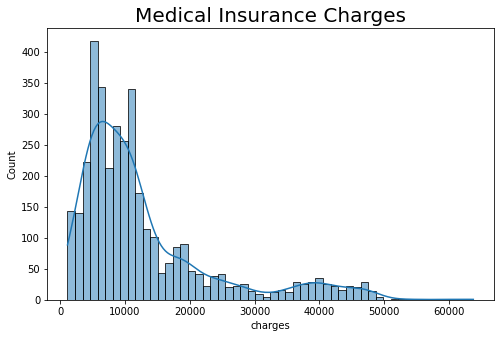

In [5]:
#code visualization
plt.figure(figsize=(8,5))
sns.histplot(df['charges'], kde=True)
plt.title('Medical Insurance Charges', fontsize=20)
plt.show()

Si tu target está desbalanceado, comenta que medida vas a tomar para intentar balancearlo. En la Guia ML se recogen algunas formas para intentar equilibrar el target.

Por la naturaleza de los datos no es necesario balancear los mismos, sobretodo tratandose de un problmema de regressión y en la mayoria de los casos no trae grandes beneficios hacer este proceso si los Outliers no son muy significativos.

Mas info:
* http://www.win-vector.com/blog/2015/02/does-balancing-classes-improve-classifier-performance/

* http://www.analyticbridge.datasciencecentral.com/forum/topics/handling-imbalanced-data-when-building-regression-models

### COMPRENSIÓN DE LAS VARIABLES

Revisa los siguientes puntos de tu dataset: <br>
    - Información del tipo de dato de cada feature <br>
    - Estadísticos básicos (min, max, media,....) <br>
    - Cantidad de missings<br>

In [6]:
# code información
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3630 entries, 0 to 3629
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       3630 non-null   float64
 1   sex       3630 non-null   object 
 2   bmi       3630 non-null   float64
 3   smoker    3630 non-null   object 
 4   region    3630 non-null   object 
 5   children  3630 non-null   int64  
 6   charges   3630 non-null   float64
dtypes: float64(3), int64(1), object(3)
memory usage: 198.6+ KB


In [7]:
#code estadísticos
df.describe()

,age,bmi,children,charges
count,3630.000000,3630.000000,3630.000000,3630.000000
mean,38.887036,30.629652,2.503581,12784.808644
std,12.151029,5.441307,1.712568,10746.166743
min,18.000000,15.960000,0.000000,1121.873900
25%,29.000000,26.694526,1.000000,5654.818262
50%,39.170922,30.200000,3.000000,9443.807222
75%,48.343281,34.100000,4.000000,14680.407505
max,64.000000,53.130000,5.000000,63770.428010


In [8]:
#code missings
df.isna().sum()

age         0
sex         0
bmi         0
smoker      0
region      0
children    0
charges     0
dtype: int64

#### ELIMINA FEATURES IRRELEVANTES

Elimina todas esas columnas repetidas o columnas que no aportan nada
<br> como aquellas que tienen identificadores, constantes, ...

No se eliminaron columnas, se trataron los datos a traves de un get dummies y se analizaron de forma numerica. Las columnas que se podrian haber eliminado seria Region, sex y smoker al ser categoricas, pero resulta importante convertirlas en numericas

#### ANOMALÍAS

¿Cuando has analizado como son tus datos y estadísticos has encontrado algo que no estaba correcto? <br>
¿hay alguna feature que tiene un tipo de dato que no le corresponde? <br>
¿Los valores máximos y mínimos tienen sentido? <br>
Algunos ejemplos: edades negativas, texto mal codificado, fechas erróneas, caracteres raros.

Comenta cualquier anomalía que hayas encontrado y como la vas a solucionar.

No hay anomalias, los datos estan bien curados y organizados.

### ANÁLISIS UNIVARIANTE

Analiza cada una de tus variables:
- Muestra con una visualización como se distribuye cada feature
- Representa los outliers
- Crea todas la visualizaciones que consideres necesarias para comprender tus features.

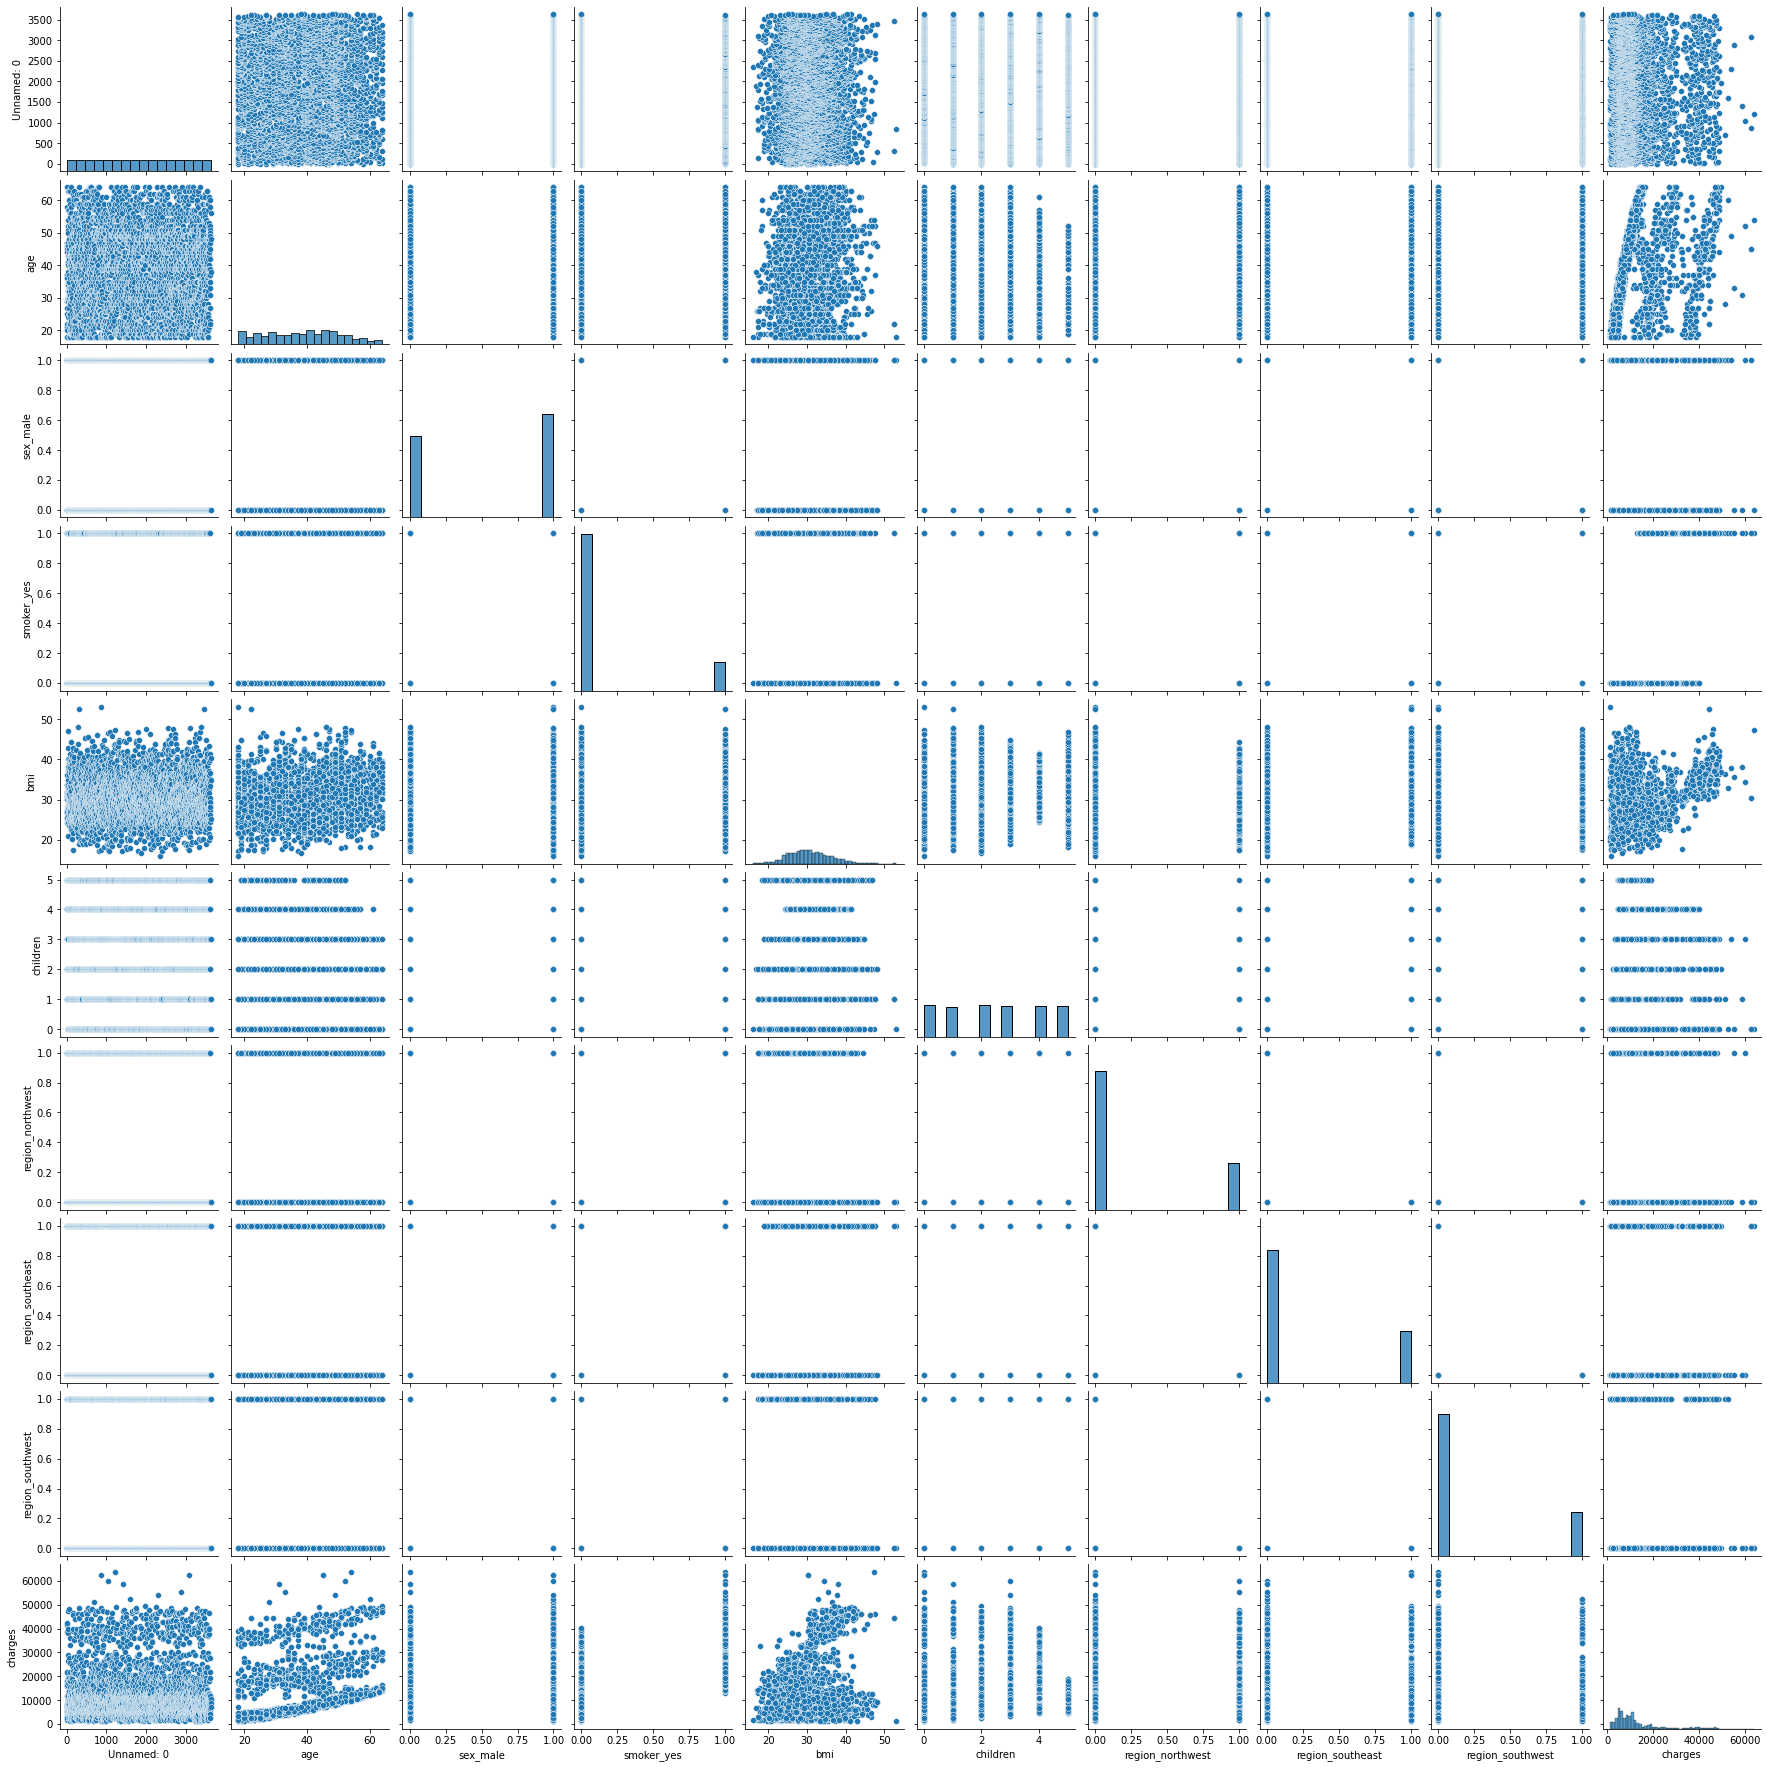

In [9]:
#code distribución
sns.pairplot(df_treated)

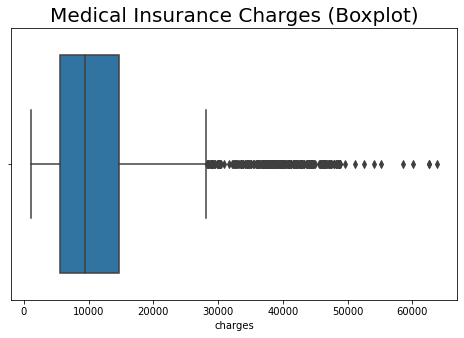

In [10]:
plt.figure(figsize=(8,5))
sns.boxplot(df['charges'])
plt.title('Medical Insurance Charges (Boxplot)', fontsize=20)
plt.show();

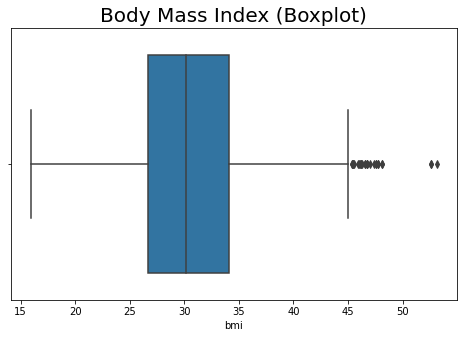

In [11]:
plt.figure(figsize=(8,5))
sns.boxplot(df['bmi'])
plt.title('Body Mass Index (Boxplot)', fontsize=20)
plt.show()

Outliers:

Las dos variables que presentan Outliers sginificativos, son, la variable de Charges, que es nuestro target, improtnate tenerlo en cuenta, y la variamo de indice de masa corporal, BMI, de resto, no hay outliers significativos, se pueden referir al resto de las graficas en el notebook data.ipynb dentro de la carpeta data.

Los Outliers, en ambos casos solo estan en la parte superior.

In [12]:
#visualizaciones extra

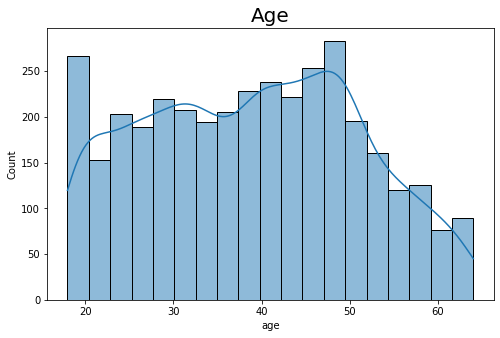

In [13]:
plt.figure(figsize=(8,5))
sns.histplot(df['age'], kde=True)
plt.title('Age', fontsize=20)
plt.show()

Smokers     : 560
Non-Smokers : 3070


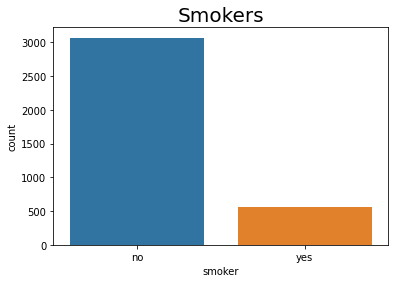

In [14]:
# Value Counts:
print("Smokers     :", df['smoker'].value_counts()[1])
print("Non-Smokers :", df['smoker'].value_counts()[0])

# Visualization:
sns.countplot(df['smoker'])
sns.countplot(df['smoker'])
plt.title('Smokers', fontsize=20)
plt.show()

South-East region : 1021
North-West region : 911
South-West region : 850
North-East region : 848


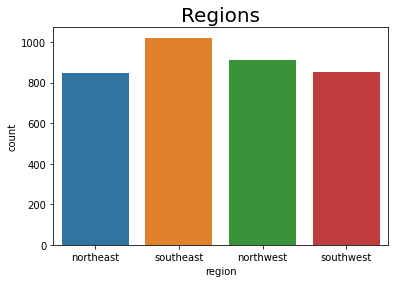

In [15]:
# Value Counts:
print("South-East region :", df['region'].value_counts()[0])
print("North-West region :", df['region'].value_counts()[1])
print("South-West region :", df['region'].value_counts()[2])
print("North-East region :", df['region'].value_counts()[3])

# Visualization:
sns.countplot(df['region'])
sns.countplot(df['region'])
plt.title('Regions', fontsize=20)
plt.show()

### ANALISIS BIVARIANTE

Antes de comenzar a analizar las features entre ellas y también con el target, escribe a continuación que features crees que son las que más influyen en el target. No tienen porque ser las correctas, pero este pequeño ejercicio nos puede ayudar desarrollar una pequeña intuición en futuros proyectos.

In [16]:
#Escribe en markdown un listado con las features que consideras que son las que más influyen en el valor del target.

A mi parecer, a simple vista, la edad, el BMI y si es fumador o no serian las variables mas fundamentales, porque son las mas relacionadas con la salud del posible asegurado, aunque ya que es un Dataset de EEUU, la region podria ser significativa a la hora de calcular los precios.

El análisis bivariante nos permite analizar las relaciones entre nuestros datos. Los objetivos de este análisis son:
1. **Relación con el target**: <br> ver qué tipo de relación hay entre cada feature con el target. <br><br>

2. **Eliminar algunas features**: <br> comprobar si hay features con una alta correlación lineal entre ellas. <br><br>

Para este apartado puedes utilizar todas las visualizaciones que consideres, algunas que funcionan muy bien son la matriz de correlación (si hay categóricas puedes utilizar la matriz de Phik), heatmap, pairplot. <br>
Revisa la Guía de ML. <br>
Comenta las conclusiones que obtienes de esas visualizaciones.

In [17]:
#code correlation features and target
df_treated.corr()

,Unnamed: 0,age,sex_male,smoker_yes,bmi,children,region_northwest,region_southeast,region_southwest,charges
Unnamed: 0,1.000000,-0.010968,-0.002784,0.015264,0.012586,-0.000350,0.024268,-0.001140,0.012664,0.007995
age,-0.010968,1.000000,-0.152059,0.026157,0.143534,-0.060885,0.097152,0.048022,-0.128405,0.299100
sex_male,-0.002784,-0.152059,1.000000,0.078318,-0.011215,0.147182,-0.180701,0.001615,0.077158,0.092703
smoker_yes,0.015264,0.026157,0.078318,1.000000,0.045921,-0.183507,-0.034372,0.048327,-0.072273,0.777175
bmi,0.012586,0.143534,-0.011215,0.045921,1.000000,-0.041996,0.014488,0.070051,-0.051727,0.211325
children,-0.000350,-0.060885,0.147182,-0.183507,-0.041996,1.000000,-0.087854,0.068287,0.095720,-0.075089
region_northwest,0.024268,0.097152,-0.180701,-0.034372,0.014488,-0.087854,1.000000,-0.362102,-0.320068,-0.043049
region_southeast,-0.001140,0.048022,0.001615,0.048327,0.070051,0.068287,-0.362102,1.000000,-0.345910,0.050719
region_southwest,0.012664,-0.128405,0.077158,-0.072273,-0.051727,0.095720,-0.320068,-0.345910,1.000000,-0.122019
charges,0.007995,0.299100,0.092703,0.777175,0.211325,-0.075089,-0.043049,0.050719,-0.122019,1.000000


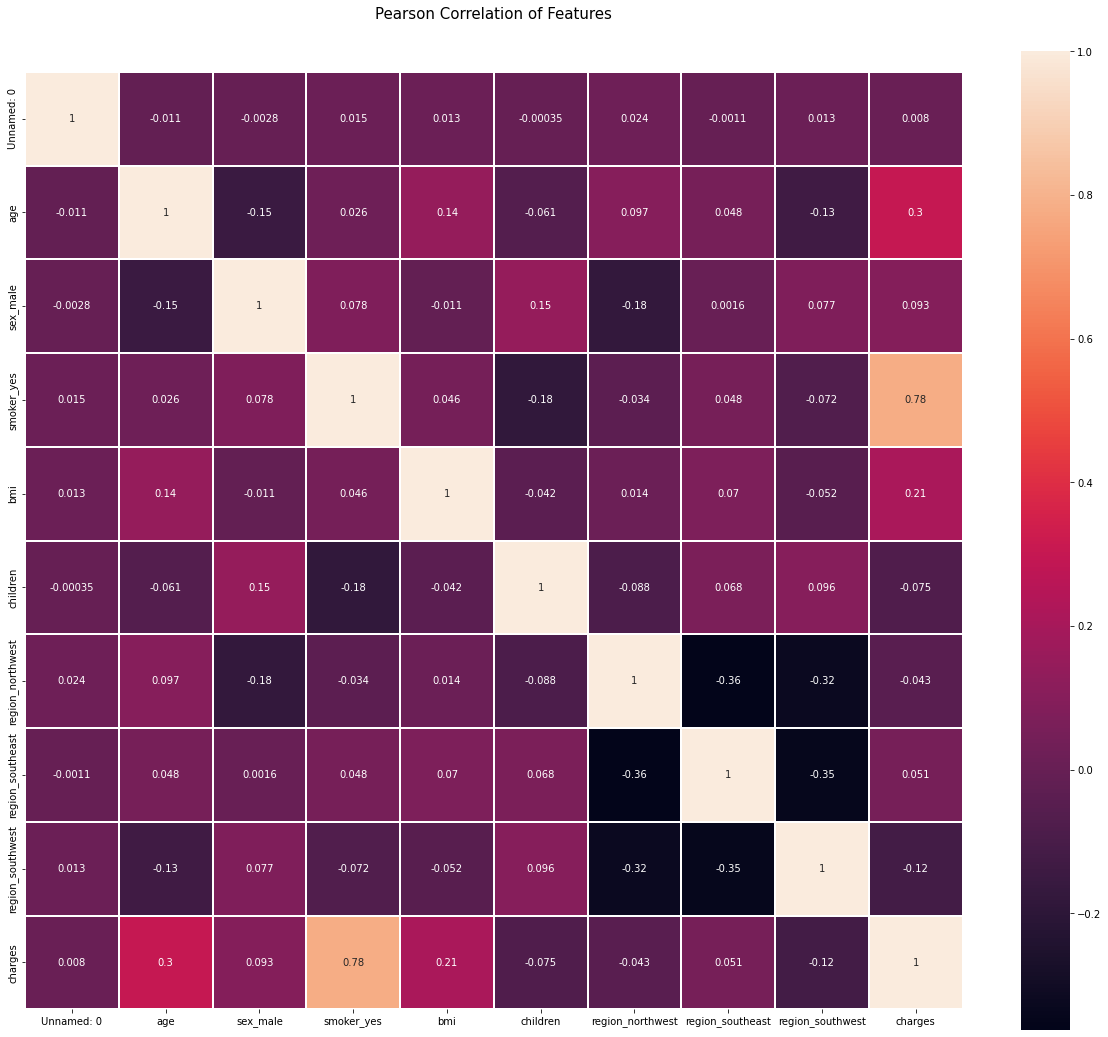

In [18]:
plt.figure(figsize=(21,18))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(df_treated.corr(),linewidths=0.1,vmax=1.0,
            square=True, linecolor='white', annot=True);

In [19]:
df_treated.drop(['Unnamed: 0',"region_northwest","region_southeast",'region_southwest'], axis=1, inplace=True)

In [20]:
df_treated.head()

,age,sex_male,smoker_yes,bmi,children,charges
0,21.0,1,0,25.745000,2,3279.868550
1,37.0,0,1,25.744165,3,21454.494239
2,18.0,1,0,30.030000,1,1720.353700
3,37.0,1,0,30.676891,3,6801.437542
4,58.0,1,0,32.010000,1,11946.625900


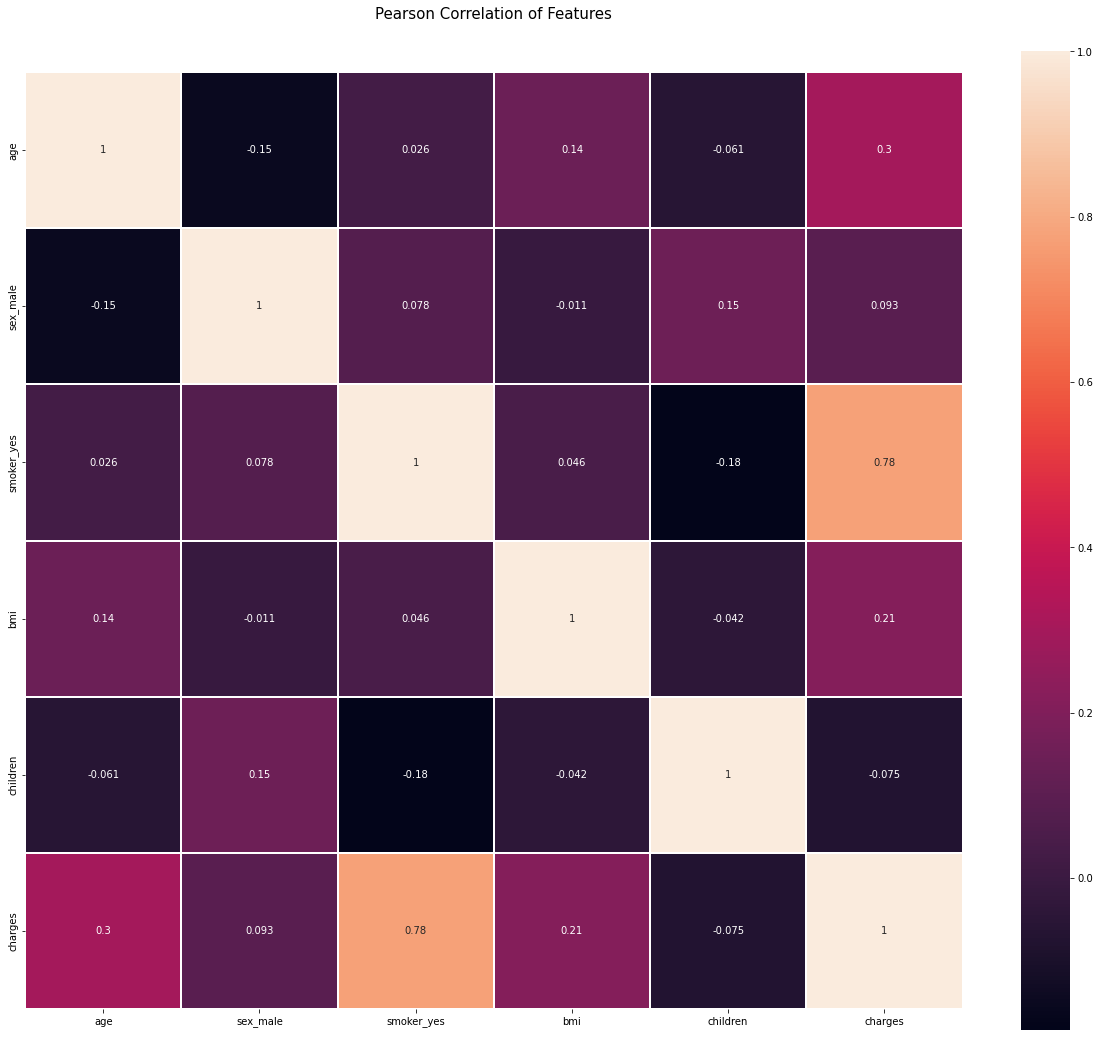

In [21]:
plt.figure(figsize=(21,18))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(df_treated.corr(),linewidths=0.1,vmax=1.0,
            square=True, linecolor='white', annot=True);

In [22]:
#comenta en markdown todas las conclusiones que has sacado de este análisis bivariante (¿Qué features tienen una alta correlacion lineal 
# con el target? ¿hay features que están muy correlacionadas con ellas?¿has acertado en tu primera previsión?)

Vemos que solo el factor si es fumador o no con alta correlación, no obstante Edad y BMI son relativamente influyentes también, la región no es un factor determinante en comparación a las demás

### DUPLICADOS

Elimina duplicados no suelen aportar nada a menos que el dataset esté muy desbalanceado.

### MISSINGS

Trata los missings:

* **Imputación sobre caso similar**: tengo en cuenta otra variable, por ejemplo si tengo la altura de alumnos de una clase, podria calcular los missings teniendo en cuenta si son chicos o chicas. O si hay missings de densidad de población, pero tengo la población y el área, podría recalcularlo. Esta opción es lo ideal, razonando los missings con los propios datos. <br><br>

* **Borrado**: Aquí hay dos opciones: si hay un missing en una columna, nos cargamos toda la fila. El borrado se realiza cuando tenemos pocos missings y muchas observaciones. De lo contrario, eliminaríamos muchos datos.<br><br>

* **Imputación por valor concreto**: No es lo más habitual, pero puede ocurrir que sepamos de antemano por qué hay missings en esa feature. Quizá todos los días hay problemas en la carga de la base de datos con el carácter Ñ, y cuando debería aparecer España, en realidad está en missing. Este método también se utiliza cuando hay missings en la variable categórica, le ponemos un nombre genérico y equivaldría a añadir una categoría nueva a la feature.<br><br>

* **Imputación de Media/Mediana/Moda**: es el método más frecuente, sobretodo si tenemos poco tiempo. Para variables numéricas imputamos normalmente la media, aunque si la variable tiene asimetría, suele dar mejores resultados la mediana. En el caso de que sea una variable categórica lo más habitual es utilizar la moda.<br><br>

* **Imputacion + flag**: es igual que el caso anterior, pero además añadimos una nueva columna binaria por cada feature con missings imputados para indicarle al modelo que en ese lugar había un missing.<br><br>

* **Modelo**: es lo más sofisticado. Dividimos el dataset en dos: uno con missings y el otro sin, que se usa para entrenar al modelo. Este método se suele comportar bien, a no ser que no tengan mucha relación los datos. Lo habitual es usar KNN, regresión logística o lineal. El KNN rellena los missings teniendo en cuenta el resto de variables del dataset, buscando similitudes con registros que tengan las variables parecidas. Se puede usar para cualitativas y cuantitativas, las variables con muchos missings se pueden tratar fácilmente. Lo malo es que es muy lento y la elección del k-value es crítica. 

In [23]:
#Escribe en Markdown como vas a tratar los missings de cada una de las columnas.

No hay missings

### ENCODING

Si tienes variables categóricas que vas a utilizar en tu modelo, es el momento de hacerles un encoding. Escribe las columnas en las que vas a aplicar un encoding y escribe el tipo de enconding que has seleccionado y por qué. En la guía tienes información.

In [24]:
# explicación

Se utilizo un get_dummies para poder diferencias las varias caracteristicas o valores categoricos y dar un valo a cada uno, si es fumador o no, en la region, no obstante al ver que las regiones no son importantes, se procedio a hacer el drop de las mismas, se mantuvo el genero y si es fumador o no.

### ESCALADOS

Los modelos trabajan mejor cuando los datos están en la misma escala, es el momento de aplicar un escalado a tus variables. En la guía tienes información. Selecciona el más adecuado a tus datos y explica por qué.

In [25]:
#Explica en markdown tu elección para el escalado 

Todos los modelos utilizados se probaron con Datos sin escalar y escalados, se utilizo StandardScaler, se considero utilizar MinMax Scaler pero es mucho mas propenso a los outliers y las distribucion no es Gaussiana, de forma que standard se propuso como alternativa.

In [26]:
from numpy import asarray
from sklearn.preprocessing import StandardScaler

data = df_treated

scaler = StandardScaler()
# We transform the Data
df_scaled = scaler.fit_transform(data)
dataset = pd.DataFrame(df_scaled)

### GUARDAR EL .CSV LIMPIO

En este punto tenemos un dataframe tratado y listo para comenzar con los modelos de machine learning. Guarda este dataframe en la carpeta correspondiente como .csv. <br>

In [27]:
#code save

Ya esta saved en la carpeta de data, como Insurace_treated_data.csv, para evitar sobreescribir y minimizar posibles fallos, no se guardara el archivo desde este notebook.

### MACHINE LEARNING

Escribe un listado con las métricas que se utilizan para el tipo de problema de tu proyecto( 'RMSE', 'accuracy',...) y que significa cada cosa. Entiende bien que significa cada una de ellas y especifica cual o cuales son en las que más te vas a centrar para tu proyecto.

In [28]:
#listado de métricas con su explicación en markdown

Utilizaremos como métricas:

-MSE: El error cuadrático medio es una medida absoluta de la eficacia del "fit" del modelo. Se calcula mediante la suma del cuadrado del error de predicción, que es la salida real - la salida prevista y luego se divide por el número de puntos de datos. Le da un número absoluto de cuánto se desvían los resultados previstos del número real.

-MAE: El error absoluto medio (MAE) es similar al error cuadrático medio (MSE). Sin embargo, en lugar de la suma del cuadrado del error en MSE, MAE está tomando la suma del valor absoluto del error. 

-RMSE: La Raiz del error cuadrático medio (RMSE) es la desviación estándar de los residuos (errores de predicción). Los residuos son una medida de qué tan lejos están los puntos de datos de la línea de regresión; RMSE es una medida de la dispersión de estos residuos. En otras palabras, le dice qué tan concentrados están los datos alrededor de la línea de mejor ajuste.

-R2 Score: R2 mide cuánta variabilidad en la variable dependiente puede ser explicada por el modelo. Es el cuadrado del Coeficiente de correlación (R) y por eso se llama R Cuadrado. R2 es una buena medida para determinar qué tan bien se ajusta el modelo a las variables dependientes. Puede obviar el Overfitting, por eso no es recomendable usarla en solitario. (utilizaremos Score ya que es posible aplicar esta metrica desde la liberira de metrics y realiza la misma operacion matematica de R2 Score)

Dependiendo del tipo de problema (Regresion o Clasificación) vamos a probar unos modelos u otros. <br><br>

En ambos casos debes de probar Decision Tree, Random Forest, SVM y KNN. Y además incluye, como mínimo, tres modelos más a este listado. Por ejemplo: <br>
* DecisionTree
* RandomForest
* SVM
* KNN
* <span style="color:orange">LinearRegression</span>
* <span style="color:orange">PolynomicalRegression</span>
* <span style="color:orange">Lasso</span> 

In [29]:
#Escribe en markdown el listado de los tres modelos que vas a utilizar en tu proyecto

Crearemos modelos de 
* LinearRegression
* PolynomicalRegression
* Lasso
* Ridge
* DecisionTree
* RandomForest
* SVM
* KNN

#### MODELOS BÁSICOS

importa todas las librerías necesarias para esta parte. Crea tus variables X_train, y_train, x_test e y_test utilizando los datos que hemos tratado anteriormente.

In [30]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [31]:
df_treated.columns

Index(['age', 'sex_male', 'smoker_yes', 'bmi', 'children', 'charges'], dtype='object')

In [32]:
dataset.rename(columns={0:'age',1:'sex_male',2:'smoker_yes',3:'bmi',4:'children',5:'charges'}, inplace=True)

In [33]:
dataset.head()

,age,sex_male,smoker_yes,bmi,children,charges
0,-1.471963,0.888290,-0.427095,-0.897822,-0.294091,-0.884618
1,-0.155350,-1.125759,2.341398,-0.897976,0.289908,0.806881
2,-1.718828,0.888290,-0.427095,-0.110219,-0.878090,-1.029761
3,-0.155350,0.888290,-0.427095,0.008683,0.289908,-0.556868
4,1.572703,0.888290,-0.427095,0.253714,-0.878090,-0.078009


En este notebook solo trabajaremos los modelos de Polynomial Regression, DTR, SVM, RFR con los datos ya estandarizados, sin embargo en el archivo models.ipynb estaran los 16 modelos, con datos regulares y estandarizados

In [34]:
#import librerias CODE
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import svm
from sklearn.neighbors import KNeighborsRegressor
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline

In [35]:
#divide los datos en X_train, y_train, x_test e y_test CODE

In [36]:
X = dataset.iloc[:, :-1]
y = dataset["charges"]


X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

Entrena los modelos de forma básica y sacas sus predicciones.

### LinearRegression

### Polynomial Regression

In [37]:
#code entrenamiento
poly_reg = PolynomialFeatures(degree=2)
poly_reg.fit(X_train), 
X_poly = poly_reg.transform(X_train)

pol_reg = LinearRegression()
pol_reg.fit(X_poly, y_train)

LinearRegression()

In [38]:
X_poly_test = poly_reg.transform(X_test)

In [39]:
predictions = pol_reg.predict(X_poly_test)
print('The model performance:' ) 
print('-------------------------------')
print('SCORE:', pol_reg.score(X_poly_test, y_test))
print('MAE:', mean_absolute_error(y_test, predictions))
print('MSE:', mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(mean_squared_error(y_test, predictions)))

The model performance:
-------------------------------
SCORE: 0.8002011611801081
MAE: 0.2753169829340549
MSE: 0.19939272660045285
RMSE: 0.44653412702777023


### Decission Tree Regressor

In [40]:
dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)

DecisionTreeRegressor()

Decision Tree Predictions:

In [41]:
#code predicciones
predictions = dtr.predict(X_test)
print('The model performance:' ) 
print('-------------------------------')
print('SCORE:', dtr.score(X_test, y_test))
print('MAE:', mean_absolute_error(y_test, predictions))
print('MSE:', mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(mean_squared_error(y_test, predictions)))

The model performance:
-------------------------------
SCORE: 0.8104654246484814
MAE: 0.14178287355622973
MSE: 0.1891493263304979
RMSE: 0.43491301007270167


### Random Forest Regressor

In [42]:
rfr = RandomForestRegressor(max_depth=2, random_state=0)
rfr.fit(X_train, y_train)

RandomForestRegressor(max_depth=2, random_state=0)

Random Forest Predictions:

In [43]:
predictions = rfr.predict(X_test)
print('The model performance:' ) 
print('-------------------------------')
print('SCORE:', rfr.score(X_test, y_test))
print('MAE:', mean_absolute_error(y_test, predictions))
print('MSE:', mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(mean_squared_error(y_test, predictions)))

The model performance:
-------------------------------
SCORE: 0.7581842765526132
MAE: 0.3160243925501415
MSE: 0.2413242074770011
RMSE: 0.49124760302417875


### Support Vector Machine (SVM)

In [44]:
regr = svm.SVR(C=1.0, epsilon=0.2)
regr.fit(X_train, y_train)

SVR(epsilon=0.2)

SVM Predictions:

In [207]:
predictions = regr.predict(X_test)
print('The model performance:' ) 
print('-------------------------------')
print('SCORE:', regr.score(X_test, y_test))
print('MAE:', mean_absolute_error(y_test, predictions))
print('MSE:', mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(mean_squared_error(y_test, predictions)))

The model performance:
-------------------------------
SCORE: 0.6004470825754988
MAE: 0.29346760191785415
MSE: 0.19006759777993176
RMSE: 0.4359674274299994


Compara las métricas de esas predicciones. ¿Cuales son los modelos que mejor resultado han dado? Selecciona los 4 mejores modelos.

Todos los modelos estan entrenados en el archivo models.ipynb arrojaron los siguientes resultados:

Compara todos los modelos entrenados y selecciona cuál es el que mejor realiza la predicción.

We now compare all the results together:

Regular Data
* Liner Regression 
Score: 0.71

* Polynomial Regression
Score: 0.80

* Lasso
Score: 0.71

* Ridge
Score: 0.71

* Decision Tree Regressor
Score: 0.82

* Random Forest Regressor
Score: 0.75

* SVM
Score: -0.09

* KNN
Score: -1.43
-------------------------------------------
Standarized Data
* Liner Regression
Score: 0.71

* Polynomial Regression
Score: 0.80

* Lasso
Score: -3.63

* Ridge
Score: 0.71

* Decision Tree Regressor
Score: 0.82

* Random Forest Regressor
Score: 0.75

* SVM
Score: 0.81

* KNN
Score: 0.39

Los MAE, MSE y RSME estan tambien en el notebook models.ipynb

Los mejores modelos son el Decission Tree Classifier, el SVM, el Random Forest Regressor y el Polynomial Regression, se continuara trabajando todos con datos estandarizados

#### GRIDSEARCH

Es el momento de intentar mejorar las predicciones base que acabamos de calcular aplicando un GridSearch. Prueba diferentes valores de hiperparámetros aplicando un gridsearch para cada uno de los modelos.

### Grid Search Decission Tree Resgressor

In [49]:
# code gridsearch modelo 1

parameters = {"max_depth":[3,5,10,15,20], "max_features":[3,4,6,8], "min_samples_split":range(2,10)}

dtr = DecisionTreeRegressor()

regressor = GridSearchCV(estimator = dtr,
                  param_grid = parameters,
                  n_jobs = -1,
                  cv = 10)

regressor.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'max_depth': [3, 5, 10, 15, 20],
                         'max_features': [3, 4, 6, 8],
                         'min_samples_split': range(2, 10)})

In [50]:
regressor.best_estimator_.predict(X)

array([-0.87566884,  0.71155093, -0.90236673, ...,  0.31534889,
       -0.0885658 , -0.4917497 ])

In [51]:
print(regressor.best_params_)
print(regressor.best_score_)

{'max_depth': 10, 'max_features': 4, 'min_samples_split': 8}
0.8430311531892138


### Grid Search Polynomial Regression

In [52]:
# code gridsearch modelo 3
from sklearn.pipeline import make_pipeline

def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree), LinearRegression(**kwargs))

parameters = {'polynomialfeatures__degree': np.arange(10), 'linearregression__fit_intercept': [True, False], 'linearregression__normalize': [True, False]}

poly_grid = GridSearchCV(estimator=PolynomialRegression(), param_grid = parameters, cv=10, scoring='neg_mean_squared_error',n_jobs=7)

poly_grid.fit(X_train,y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('polynomialfeatures',
                                        PolynomialFeatures()),
                                       ('linearregression',
                                        LinearRegression())]),
             n_jobs=7,
             param_grid={'linearregression__fit_intercept': [True, False],
                         'linearregression__normalize': [True, False],
                         'polynomialfeatures__degree': array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])},
             scoring='neg_mean_squared_error')

In [53]:
poly_grid.best_estimator_.predict(X)

array([-0.85524821,  0.98290229, -0.90881741, ...,  0.0194999 ,
       -0.23763347, -0.38129139])

In [54]:
print(poly_grid.best_params_)
print(poly_grid.best_score_)

{'linearregression__fit_intercept': True, 'linearregression__normalize': False, 'polynomialfeatures__degree': 5}
-0.173031935582509


### Grid Search Random Forest

In [55]:
# code gridsearch modelo 4
parameters = param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}

rf = RandomForestRegressor()

rf = GridSearchCV(estimator = rf,
                  param_grid = parameters,
                  n_jobs = -1,
                  cv = 3)

rf.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [80, 90, 100, 110],
                         'max_features': [2, 3], 'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [8, 10, 12],
                         'n_estimators': [100, 200, 300, 1000]})

In [56]:
rf.best_estimator_.predict(X)

array([-0.81047746,  0.68846775, -0.78623093, ..., -0.0113314 ,
       -0.18617285, -0.15469398])

In [57]:
print(rf.best_params_)
print(rf.best_score_)

{'bootstrap': True, 'max_depth': 90, 'max_features': 3, 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 100}
0.8702681495306245


### Grid Search SVM

In [58]:
# code gridsearch modelo 2 - fail

#modelsvr = svm.SVR()

#parameters = {'kernel' : ('linear', 'poly', 'rbf', 'sigmoid'),'C' : [1,5,10],'degree' : [3,6],'coef0' : [0.01,10,0.5],'gamma' : ('auto','scale')}

#grids = GridSearchCV(estimator= modelsvr,param_grid = parameters,cv=3, n_jobs=6)

#grids.fit(X_train,y_train)

El Grid search del SVR tarda mas de 4 horas y de las 3 veces que se ha probado ha colgado la maquina y forzado a reiniciar el Kernel, seria ideal contar con un ordenador que tuviese GPU o en su defecto probar hacerlo en Cloud.

En base a los resultados, continuaremos con los parametros actualizados por el Grid Search de DTR y RF

#### ENSEMBLES

In [142]:
#importa las librerias necesarias
from sklearn.metrics import accuracy_score
from sklearn.ensemble import VotingRegressor
from sklearn.model_selection import cross_val_score

In [143]:
rf_best = RandomForestRegressor(bootstrap= True, max_depth= 90, max_features= 3, min_samples_leaf= 3, min_samples_split= 8, n_estimators= 100)

In [144]:
dtr_best = DecisionTreeRegressor(max_depth= 10, max_features= 4, min_samples_split= 8)

In [145]:
voting_reg = VotingRegressor(
    estimators=[('rf', rf_best), ('dtr', dtr_best)])

In [158]:
voting_reg.fit(X_train,y_train)

VotingRegressor(estimators=[('rf',
                             RandomForestRegressor(max_depth=90, max_features=3,
                                                   min_samples_leaf=3,
                                                   min_samples_split=8)),
                            ('dtr',
                             DecisionTreeRegressor(max_depth=10, max_features=4,
                                                   min_samples_split=8))])

In [167]:
dtr.score(X_train,y_train)

-0.14759798445433403

In [168]:
rf.score(X_train,y_train)

0.20169503908925246

In [165]:
voting_reg.score(X_train,y_train)

0.7317867770134254

In [111]:
pred = voting_reg.predict(X_test)

In [113]:
preds_df = pd.DataFrame({"test prices":y_test,'Predicted charges':pred},index=None)

In [114]:
preds_df

,test prices,Predicted charges
693,-0.163929,-0.154964
3220,-0.538455,-0.516710
432,-1.004950,-0.976584
183,0.013246,0.121082
2620,0.438859,0.322394
...,...,...
1378,-0.895638,-0.788434
2771,0.896056,0.837870
2973,0.585078,0.606640
2493,-0.738146,-0.735386


#### COMPARACIÓN DE TODOS LOS MODELOS ENTRENADOS CON PARAMETROS AJUSTADOS

Dado que tanto el Decission Tree como el Random Forest arrojaron resultados mejorados con Gridsearch, volveremos a entrenar esos modelos con los datos estandarizados y los parámetros de Grid Search.

### Decision Tree Regressor (parametros ideales)

In [45]:
dtr = DecisionTreeRegressor(max_depth= 10, max_features= 4, min_samples_split= 6)
dtr.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=10, max_features=4, min_samples_split=6)

In [46]:
predictions = dtr.predict(X_test)
print('The model performance:' ) 
print('-------------------------------')
print('SCORE:', dtr.score(X_test, y_test))
print('MAE:', mean_absolute_error(y_test, predictions))
print('MSE:', mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(mean_squared_error(y_test, predictions)))

The model performance:
-------------------------------
SCORE: 0.8406855425909427
MAE: 0.18036556836359255
MSE: 0.158990633966092
RMSE: 0.39873629627373025


### Random Forest Regressor (parametros ideales)

In [47]:
rf = RandomForestRegressor(bootstrap= True, max_depth= 110, max_features= 3, min_samples_leaf= 3, min_samples_split= 8, n_estimators= 200)
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=110, max_features=3, min_samples_leaf=3,
                      min_samples_split=8, n_estimators=200)

In [48]:
predictions = rf.predict(X_test)
print('The model performance:' ) 
print('-------------------------------')
print('SCORE:', rf.score(X_test, y_test))
print('MAE:', mean_absolute_error(y_test, predictions))
print('MSE:', mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(mean_squared_error(y_test, predictions)))

The model performance:
-------------------------------
SCORE: 0.8767961148121611
MAE: 0.17467963999406688
MSE: 0.12295346029271599
RMSE: 0.35064720203178007


We retrain the model with non scalated data and create a new entry for the model to test and see the results we will get from the predictions:

In [58]:
df = pd.read_csv("../data/processed/Insurance_treated_data.csv")
df.drop(['Unnamed: 0'],1, inplace=True)

In [59]:
X = df.iloc[:, :-1]
y = df["charges"]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [60]:
rf = RandomForestRegressor(bootstrap= True, max_depth= 110, max_features= 3, min_samples_leaf= 3, min_samples_split= 8, n_estimators= 200)
rf.fit(X_train, y_train)
predictions = rf.predict(X_test)

In [61]:
test_variable = X_train.iloc[2]
test_variable.array

<PandasArray>
[21.0, 1.0, 1.0, 25.7, 4.0]
Length: 5, dtype: float64

In [62]:
test_variable

age           21.0
sex_male       1.0
smoker_yes     1.0
bmi           25.7
children       4.0
Name: 3586, dtype: float64

In [63]:
New_customer_1= [[30, 0, 1, 21, 3]]
print("New customer 1 Insurance cost:", rf.predict(New_customer_1))

New_customer_2= [[65, 0, 1, 21, 3]]
print("New customer 2 Insurance cost:", rf.predict(New_customer_2))

New_customer_2= [[65, 0, 0, 21, 3]]
print("New customer 3 Insurance cost:", rf.predict(New_customer_2))

New customer 1 Insurance cost: [17813.41451675]
New customer 2 Insurance cost: [25488.59525738]
New customer 3 Insurance cost: [16736.6971343]


In [66]:
from sklearn import model_selection
import pickle
#model = rf
#  Save Model Using Pickle
# We save the train Random Forest Regressor model as final_model_pkl
#with open('../model/final_model_pkl', 'wb') as files:
#    pickle.dump(model, files)


We do a test loading the model to see if it works and yields similar results

In [67]:
#load saved model
with open('../model/final_model_pkl' , 'rb') as f:
    rf2 = pickle.load(f)

In [68]:
rf2.predict(New_customer_1) #Same result

array([17441.53071221])

Ya tenemos el mejor modelo seleccionado. <br>
Ahora es el momento de crear un script **train.py** donde podamos entrenar nuestro modelo.  

#### TRAIN.PY

El archivo train.py sirve para entrenar nuestro modelo cada vez que se ejecute. Este script debe de tener la siguiente estructura:
* import librerias
* rooth_path
* carga de los .csv
* procesado de datos
* division en train test
* entrenamiento del modelo
* evaluación del modelo
* guardar el modelo
